# Caderno para análises diversas, construção de gráficos das estatísticas e de relatórios

In [48]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from itertools import product

diffs = {}
threshold = 0.9
tables = ['table1.csv']#,'table2.csv','table3.csv']
metrics = ["Accuracy","Recall","F1","AUC"]

dfr = pd.read_csv("Stats.csv")

#Auxiliar de parametrização para cenários
aux = dfr.groupby(['HAI','Files','Selector','N_Samples','Test_Size','Contamination']).count().reset_index()
params = []
for i in range(aux.shape[0]):
    params.append((aux.iloc[i,0],
                    aux.iloc[i,1],
                    aux.iloc[i,2],
                    aux.iloc[i,3],
                    aux.iloc[i,4],
                    aux.iloc[i,5]))

## Estrutura da tabela para consulta  

|Params|||
|-|-|-|
|HAI|Files|Selector|
|N_Samples|Test_Size|Contamination|

|s1clf|
|-|
|Classifier_1s|

|s2clf_metric_Median||||
|-|-|-|-|
|Classifier_2s_Accuracy_Median|Classifier_2s_Recall_Median|Classifier_2s_F1_Median|Classifier_2s_AUC_Median|

|metric_1s_median||||
|-|-|-|-|
|Accuracy_1s_Median|Recall_1s_Median|F1_1s_Median|AUC_1s_Median|

|metric_2s_median||||
|-|-|-|-|
|Accuracy_2s_Median|Recall_2s_Median|F1_2s_Median|AUC_2s_Median|

|metric_Abs/Rel_median||||
|-|-|-|-|
|Accuracy_Abs_Median|Accuracy_Rel_Median|Recall_Abs_Median|Recall_Rel_Median|
|F1_Abs_Median|F1_Rel_Median|AUC_Abs_Median|AUC_Rel_Median|

|FP/FN/FPR/FNR_1s_median||||
|-|-|-|-|
|FP_1s_Median|FN_1s_Median|FPR_1s_Median|FNR_1s_Median|

|FP/FN/FPR/FNR_2s_median_metric||||
|-|-|-|-|
|FP_2s_Median_Accuracy|FN_2s_Median_Accuracy|FPR_2s_Median_Accuracy|FNR_2s_Median_Accuracy|
|FP_2s_Median_Recall|FN_2s_Median_Recall|FPR_2s_Median_Recall|FNR_2s_Median_Recall|
|FP_2s_Median_F1|FN_2s_Median_F1|FPR_2s_Median_F1|FNR_2s_Median_F1|
|FP_2s_Median_AUC|FN_2s_Median_AUC|FPR_2s_Median_AUC|FNR_2s_Median_AUC|

|s2clf_metric_Mean||||
|-|-|-|-|
|Classifier_2s_Accuracy_Mean|Classifier_2s_Recall_Mean|Classifier_2s_F1_Mean|Classifier_2s_AUC_Mean|

|metric_1s_mean||||
|-|-|-|-|
|Accuracy_1s_Mean|Recall_1s_Mean|F1_1s_Mean|AUC_1s_Mean|

|metric_2s_mean||||
|-|-|-|-|
|Accuracy_2s_Mean|Recall_2s_Mean|F1_2s_Mean|AUC_2s_Mean|

|metric_Abs/Rel_mean||||
|-|-|-|-|
|Accuracy_Abs_Mean|Accuracy_Rel_Mean|Recall_Abs_Mean|Recall_Rel_Mean|
|F1_Abs_Mean|F1_Rel_Mean|AUC_Abs_Mean|AUC_Rel_Mean|

|FP/FN/FPR/FNR_1s_mean||||
|-|-|-|-|
|FP_1s_Mean|FN_1s_Mean|FPR_1s_Mean|FNR_1s_Mean|

|FP/FN/FPR/FNR_2s_median_metric||||
|-|-|-|-|
|FP_2s_Mean_Accuracy|FN_2s_Mean_Accuracy|FPR_2s_Mean_Accuracy|FNR_2s_Mean_Accuracy|
|FP_2s_Mean_Recall|FN_2s_Mean_Recall|FPR_2s_Mean_Recall|FNR_2s_Mean_Recall|
|FP_2s_Mean_F1|FN_2s_Mean_F1|FPR_2s_Mean_F1|FNR_2s_Mean_F1|
|FP_2s_Mean_AUC|FN_2s_Mean_AUC|FPR_2s_Mean_AUC|FNR_2s_Mean_AUC|

## Relatório
Relatório em texto simples com informações diversas

In [65]:
# Criação do arquivo txt
relatorio = open("Relatório.txt",'w',encoding='utf-8')
relatorio.write("Qual a redução média de FN para FP, para cada métrica, no âmbito de todos os cenários e considerando apenas os casos em que houve melhoria?\n")
relatorio.write("Obs: média das médias das medianas.\n")

amfp = {}  #aumento médio de fp por métrica
amfpr = {} #aumento médio de fpr por métrica
rmfn = {}  #redução média de fn por métrica
rmfnr = {} #redução média de fnr por métrica
for metric in metrics:
    amfp[metric] = []
    amfpr[metric] = []
    rmfn[metric] = []
    rmfnr[metric] = []

for version,files,fselector,n_samples,test_size,contamination in params:
    for metric in metrics:
        escopo = dfr.query("HAI == '"+version+
                           "' and Files == '"+files+
                           "' and Selector == '"+fselector+
                           "' and N_Samples == "+str(n_samples)+
                           " and Test_Size == "+str(test_size)+
                           " and Contamination == "+str(contamination)+
                           " and Classifier_2s_"+metric+"_Median != '1step_only'") 
        amfp[metric].append((escopo['FP_2s_Median_'+metric]-escopo['FP_1s_Median']).mean())
        amfpr[metric].append((escopo['FPR_2s_Median_'+metric]-escopo['FPR_1s_Median']).mean())
        rmfn[metric].append((escopo['FN_1s_Median']-escopo['FN_2s_Median_'+metric]).mean())
        rmfnr[metric].append((escopo['FNR_1s_Median']-escopo['FNR_2s_Median_'+metric]).mean())

df_amfp = pd.DataFrame(amfp)
df_amfpr = pd.DataFrame(amfpr)
df_rmfn = pd.DataFrame(rmfn)
df_rmfnr = pd.DataFrame(rmfnr)
relatorio.write("\tPara os "+str(df_amfp.shape[0])+" cenários, os aumentos e redução por métrica:\n")
for metric in metrics:
    relatorio.write("\tAumento médio de FP para a métrica "+metric+":"+str(df_amfp[metric].mean()))
    relatorio.write("\n\tRedução média de FN para a métrica "+metric+":"+str(df_rmfn[metric].mean()))
    relatorio.write("\n\tAumento médio de FPR para a métrica "+metric+":"+str(df_amfpr[metric].mean()))
    relatorio.write("\n\tRedução média de FNR para a métrica "+metric+":"+str(df_rmfnr[metric].mean())+'\n\n')

# Ganho médio, mínimo e máximo para cada cenário, para cada métrica
relatorio.write("Ganho médio, mínimo e máximo para cada cenário, para cada métrica.\n")
relatorio.write("Obs: médias dos ganhos medianos\n")

for param in params:
    cenario = []
    for each in param:
        cenario.append(str(each))
    
    for metric in metrics:
        escopo = dfr.query("HAI == '"+param[0]+
                           "' and Files == '"+param[1]+
                           "' and Selector == '"+param[2]+
                           "' and N_Samples == "+str(param[3])+
                           " and Test_Size == "+str(param[4])+
                           " and Contamination == "+str(param[5])+
                           " and Classifier_2s_"+metric+"_Median != '1step_only'")
        relatorio.write("\tCenário: "+'_'.join(cenario)+'\n')
        relatorio.write("\tMétrica "+metric)
        if escopo.shape[0] == 0:
            relatorio.write("\n\t\tNão houve ganhos para este cenário, nesta métrica.\n\n")
            continue
        relatorio.write("\n\t\tGanho médio Abs: "+str(escopo[metric+"_Abs_Median"].mean()))
        relatorio.write("\n\t\tGanho médio Rel: "+str(escopo[metric+"_Rel_Median"].mean()))
        relatorio.write("\n\n\t\tGanho mínimo Abs: "+str(escopo[metric+"_Abs_Median"].min()))
        relatorio.write("\n\t\tGanho mínimo Rel: "+str(escopo[metric+"_Rel_Median"].min()))
        relatorio.write("\n\n\t\tGanho máximo Abs: "+str(escopo[metric+"_Abs_Median"].max()))
        relatorio.write("\n\t\tGanho máximo Rel: "+str(escopo[metric+"_Rel_Median"].max())+'\n\n')

# Confirmar se em todos os cenários houve ao menos uma detecção em duas etapas com ganho em recall
relatorio.write("\nEm todos os cenários houve ao menos uma detecção em duas etapas com ganho em recall?\n")
counter = 0
for param in params:
    cenario = []
    for each in param:
        cenario.append(str(each))
    
    escopo = dfr.query("HAI == '"+param[0]+
                       "' and Files == '"+param[1]+
                       "' and Selector == '"+param[2]+
                       "' and N_Samples == "+str(param[3])+
                       " and Test_Size == "+str(param[4])+
                       " and Contamination == "+str(param[5])+
                       " and Classifier_2s_Recall_Median != '1step_only'")
    if escopo.shape[0] == 0:
        relatorio.write("\tNo cenário "+'_'.join(cenario)+" não houve melhorias na métrica Recall.\n")
        counter += 1

relatorio.write("\tForam encontrados "+str(counter)+" cenário(s) em que não houve ao menos uma melhoria na métrica recall.\n\n")

# Contar classificadores 1s e 2s de melhor resultado para cada métrica.
relatorio.write("Quais os classificadores 1s e 2s mais recorrentes para cada métrica?\n")
relatorio.write("Obs: Considerado apenas os casos em que houve melhoria.\n")
for metric in metrics:
    counter_1s = {}
    counter_2s = {}
    for version,files,fselector,n_samples,test_size,contamination in params:
        escopo = dfr.query("HAI == '"+version+
                           "' and Files == '"+files+
                           "' and Selector == '"+fselector+
                           "' and N_Samples == "+str(n_samples)+
                           " and Test_Size == "+str(test_size)+
                           " and Contamination == "+str(contamination)+
                           " and Classifier_2s_"+metric+"_Median != '1step_only'")
        if escopo.shape[0] == 0:
            continue
        best_1s = escopo[metric+'_1s_Median'].idxmax()
        best_2s = escopo[metric+'_2s_Median'].idxmax()
        clf_1s = escopo.loc[best_1s,'Classifier_1s']
        clf_2s = escopo.loc[best_2s,'Classifier_2s_'+metric+'_Median']
        if clf_1s not in counter_1s.keys():
            counter_1s[clf_1s] = 0
        if clf_2s not in counter_2s.keys():
            counter_2s[clf_2s] = 0
        counter_1s[clf_1s] += 1
        counter_2s[clf_2s] += 1
    df1s = pd.DataFrame(counter_1s.values(),index=counter_1s.keys())
    best_1s = df1s.idxmax().to_list()[0]
    df2s = pd.DataFrame(counter_2s.values(),index=counter_2s.keys())
    best_2s = df2s.idxmax().to_list()[0]
    relatorio.write("\tClassificador supervisionado mais empregado na métrica "+
                    metric+": "+best_1s+", com "+str(df1s.loc[best_1s].to_list()[0])+
                    " instâncias dentre "+str(df1s.sum().to_list()[0])+".\n")
    relatorio.write("\tClassificador não supervisionado mais empregado na métrica "+
                    metric+": "+best_2s+", com "+str(df2s.loc[best_2s].to_list()[0])+
                    " instâncias dentre "+str(df2s.sum().to_list()[0])+".\n\n")
relatorio.close()

## Gerar tabela .tex com ganhos relativos mínimos, médios e máximos para uma métrica específica

In [75]:
#Extração parametros para derivações
aux = dfr.groupby(['HAI','Files','Selector']).count().reset_index()
params = []
for i in range(aux.shape[0]):
    params.append((aux.iloc[i,0],
                    aux.iloc[i,1],
                    aux.iloc[i,2]))
textable = {}
textable['Derivação'] = []
textable['Mínimo'] = []
textable['Médio'] = []
textable['Máximo'] = []

metric = metrics[3] # Seleção da métrica de interesse
mode = "Mean"
for param in params:
    escopo = dfr.query("HAI == '"+param[0]+
                        "' and Files == '"+param[1]+
                        "' and Selector == '"+param[2]+"'")
    textable['Derivação'].append("\_".join([param[0],param[1],param[2]]))
    textable['Mínimo'].append(escopo.query(metric+"_Rel_"+mode+" != 0.0")[metric+"_Rel_"+mode].min())
    textable['Médio'].append(escopo.query(metric+"_Rel_"+mode+" != 0.0")[metric+"_Rel_"+mode].mean())
    textable['Máximo'].append(escopo[metric+"_Rel_"+mode].max())
out = "Ganhos_der_"+metric+"_"+mode+".tex"
textable['temp'] = []
for v in textable["Mínimo"]:
    if v < 0.0001:
        textable['temp'].append("< 0,0001")
    elif np.isnan(v):
        textable['temp'].append("N/D")
    else:
        textable['temp'].append("{:0.4f}".format(v))
textable['Mínimo'] = textable['temp']
textable.pop('temp')
pd.DataFrame(textable).to_latex(out,index=False,decimal=',',formatters={'Médio':"{:0.2f}".format,'Máximo':"{:0.2f}".format})

## Qual as maiores métricas na supervisionada, para qual classificador e cenário?

In [73]:
dfr = pd.read_csv("Stats.csv")
aux = dfr.groupby(['HAI','Files','Selector','N_Samples','Test_Size','Contamination']).count().reset_index()
params = []
for i in range(aux.shape[0]):
    params.append((aux.iloc[i,0],
                    aux.iloc[i,1],
                    aux.iloc[i,2],
                    aux.iloc[i,3],
                    aux.iloc[i,4],
                    aux.iloc[i,5]))
mode = "Median"
for metric in metrics:
    max_value = dfr[metric+"_1s_"+mode].max()
    print("Métrica:",metric,", valor:",max_value)
    escopo = dfr.query(metric+"_1s_"+mode+" == "+str(max_value))
    print(escopo[['HAI','Files','Selector','N_Samples','Test_Size','Contamination','Classifier_1s']])
    print('\n')
    

Métrica: Accuracy , valor: 1.0
        HAI Files Selector  N_Samples  Test_Size  Contamination  \
3451  hai22   te1      sfm       2941        295             29   
3464  hai22   te1      sfm       2941        295             74   
3470  hai22   te1      sfm       2941        295             74   
3473  hai22   te1      sfm       2941        295             74   
3483  hai22   te1      sfm       2941        295             89   
3489  hai22   te1      sfm       2941        295             89   
3491  hai22   te1      sfm       2941        295             89   
3492  hai22   te1      sfm       2941        295             89   
3679  hai22   te1      sfm       5882        589             59   

               Classifier_1s  
3451              ExtraTrees  
3464  RandomForestClassifier  
3470              ExtraTrees  
3473           Bagging-ETree  
3483  RandomForestClassifier  
3489              ExtraTrees  
3491              Bagging-RF  
3492           Bagging-ETree  
3679              E

## Cenários em que não ocorrem melhorias

In [48]:
#Auxiliar de parametrização para cenários
aux = dfr.groupby(['HAI','Files','Selector','N_Samples','Test_Size','Contamination']).count().reset_index()
params = []
for i in range(aux.shape[0]):
    params.append((aux.iloc[i,0],
                    aux.iloc[i,1],
                    aux.iloc[i,2],
                    aux.iloc[i,3],
                    aux.iloc[i,4],
                    aux.iloc[i,5]))

# Confirmar se em todos os cenários houve ao menos uma detecção em duas etapas com ganho em cada métrica
for metric in metrics:
    print(metric)
    counter = 0
    for param in params:
        cenario = []
        for each in param:
            cenario.append(str(each))
        
        escopo = dfr.query("HAI == '"+param[0]+
                        "' and Files == '"+param[1]+
                        "' and Selector == '"+param[2]+
                        "' and N_Samples == "+str(param[3])+
                        " and Test_Size == "+str(param[4])+
                        " and Contamination == "+str(param[5])+
                        " and Classifier_2s_"+metric+"_Median != '1step_only'")
        if escopo.shape[0] == 0:
            print("\tNo cenário "+'_'.join(cenario)+" não houve melhorias na métrica",metric)
            counter += 1
    print("\tForam encontrados "+str(counter)+" cenário(s) em que não houve ao menos uma melhoria na métrica",metric,"\n")

Accuracy
	No cenário hai20_te2_rfcv10_1094_110_5 não houve melhorias na métrica Accuracy
	No cenário hai22_te1_sfm_2941_295_15 não houve melhorias na métrica Accuracy
	No cenário hai22_te1_sfm_2941_1030_51 não houve melhorias na métrica Accuracy
	No cenário hai22_te1_sfm_2941_1471_74 não houve melhorias na métrica Accuracy
	No cenário hai22_te1_sfm_5882_589_29 não houve melhorias na métrica Accuracy
	No cenário hai22_te1_sfm_5882_2059_103 não houve melhorias na métrica Accuracy
	No cenário hai22_te1_sfm_5882_2941_147 não houve melhorias na métrica Accuracy
	No cenário hai22_tr1_te1_rfcv10_2697_269_13 não houve melhorias na métrica Accuracy
	No cenário hai22_tr1_te1_rfcv10_2697_269_27 não houve melhorias na métrica Accuracy
	No cenário hai22_tr1_te1_rfcv10_2697_269_67 não houve melhorias na métrica Accuracy
	No cenário hai22_tr1_te1_rfcv10_2697_269_89 não houve melhorias na métrica Accuracy
	No cenário hai22_tr1_te1_rfcv10_2697_943_47 não houve melhorias na métrica Accuracy
	No cenário 

### Distribuição de classificadores supervisionados melhores avaliados nesses casos:

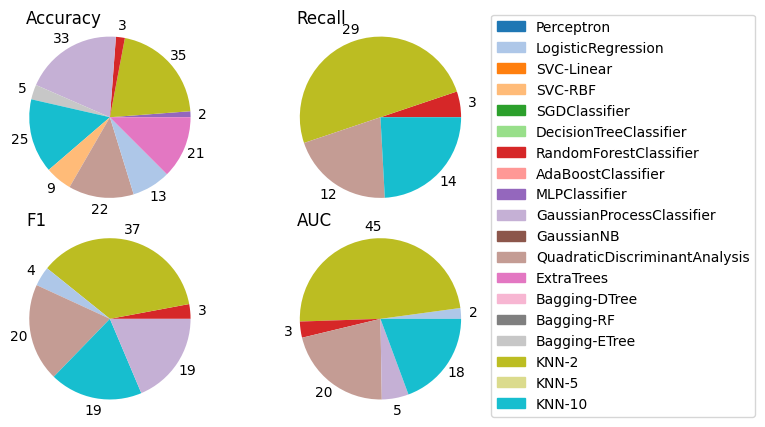

In [8]:
# Contar classificadores 1s quando 1s_only
tab20 = mpl.colormaps['tab20']
colours = {'Perceptron':tuple,
           'LogisticRegression':tuple,
           'SVC-Linear':tuple,
           'SVC-RBF':tuple,
           'SGDClassifier':tuple,
           'DecisionTreeClassifier':tuple,
           'RandomForestClassifier':tuple,
           'AdaBoostClassifier':tuple,
           'MLPClassifier':tuple,
           'GaussianProcessClassifier':tuple,
           'GaussianNB':tuple,
           'QuadraticDiscriminantAnalysis':tuple,
           'ExtraTrees':tuple,
           'Bagging-DTree':tuple,
           'Bagging-RF':tuple,
           'Bagging-ETree':tuple,
           'KNN-2':tuple,
           'KNN-5':tuple,
           'KNN-10':tuple}
patches = []
for j,k in enumerate(colours.keys()):
    colours[k]=tab20(j)
    patches.append(mpatches.Patch(color=tab20(j),label=k))
fig,ax = plt.subplots(2,2)
a,b = 0,0
overall = {}
for metric in metrics:
    counter_1s = {}
    for version,files,fselector,n_samples,test_size,contamination in params:
        escopo = dfr.query("HAI == '"+version+
                            "' and Files == '"+files+
                            "' and Selector == '"+fselector+
                            "' and N_Samples == "+str(n_samples)+
                            " and Test_Size == "+str(test_size)+
                            " and Contamination == "+str(contamination)+
                            " and Classifier_2s_"+metric+"_Median == '1step_only'")
                            
        if escopo.shape[0] != 19:
            continue
        
        max_value = escopo[metric+'_1s_Median'].max()
        candidatos = escopo.query(metric+'_1s_Median == '+str(max_value))
        if candidatos.shape[0] != 1: #primeiro critério de desempate: menor FN
            min_fn = candidatos["FN_1s_Median"].min()
            candidatos = candidatos.query("FN_1s_Median == "+str(min_fn))
            if candidatos.shape[0] != 1: #Segundo critério de desempate: menor FP
                min_fp = candidatos["FP_1s_Median"].min()
                candidatos = candidatos.query("FP_1s_Median == "+str(min_fp))
                if candidatos.shape[0] != 1: #Terceiro critério de desempate: menor FN na média
                    min_fn = candidatos["FN_1s_Mean"].min()
                    candidatos = candidatos.query("FN_1s_Mean == "+str(min_fn))
                    if candidatos.shape[0] != 1: #Quarto critério de desempate: menor FP na média. Se mais de um, todos somam
                        min_fp = candidatos["FP_1s_Mean"].min()
                        candidatos = candidatos.query("FP_1s_Mean == "+str(min_fp))
        for clf_1s in candidatos['Classifier_1s'].to_list():
            if clf_1s not in counter_1s.keys():
                counter_1s[clf_1s] = 0
            counter_1s[clf_1s] += 1

    # Reordenar por questão de visualização
    val_asc = {k: counter_1s[k] for k in sorted(counter_1s.keys(),key=counter_1s.__getitem__,reverse=False)}
    val_desc = {k: counter_1s[k] for k in sorted(counter_1s.keys(),key=counter_1s.__getitem__,reverse=True)}
    aux = {}
    for k1,k2 in zip(val_asc,val_desc):
        if k1 in aux.keys() and k2 in aux.keys():
            continue
        elif k1 in aux.keys():
            aux[k2] = val_desc[k2]
        elif k2 in aux.keys():
            aux[k1] = val_asc[k1]
        else:
            aux[k1] = val_asc[k1]
            aux[k2] = val_desc[k2]
    ax[a][b].pie(aux.values(),
                 autopct=lambda x:np.round(x/100.*pd.Series(aux.values()).sum(),0).astype(int),
                 pctdistance=1.15,
                 startangle=0,
                 radius=1.2,
                 colors=[colours[x] for x in aux.keys()])
    ax[a][b].set_title(metric,y=1.01,loc='left')
    b = (b+1) % 2
    a = (a + b + 1) % 2
    overall[metric] = counter_1s
fig.legend(patches,colours.keys(),loc='center right',bbox_to_anchor=(1.32,0.5))
# plt.savefig("pies_1s_only.png",bbox_inches="tight")
plt.show()
plt.close()

## Gráfico de pizza para supervisionados em qualquer caso, por cenário

In [15]:
# Contar classificadores 1s, independente de ter 2s
tab20 = mpl.colormaps['tab20']
colours = {'Perceptron':tuple,
           'LogisticRegression':tuple,
           'SVC-Linear':tuple,
           'SVC-RBF':tuple,
           'SGDClassifier':tuple,
           'DecisionTreeClassifier':tuple,
           'RandomForestClassifier':tuple,
           'AdaBoostClassifier':tuple,
           'MLPClassifier':tuple,
           'GaussianProcessClassifier':tuple,
           'GaussianNB':tuple,
           'QuadraticDiscriminantAnalysis':tuple,
           'ExtraTrees':tuple,
           'Bagging-DTree':tuple,
           'Bagging-RF':tuple,
           'Bagging-ETree':tuple,
           'KNN-2':tuple,
           'KNN-5':tuple,
           'KNN-10':tuple}
patches = []
for j,k in enumerate(colours.keys()):
    colours[k]=tab20(j)
    patches.append(mpatches.Patch(color=tab20(j),label=k))
fig,ax = plt.subplots(2,2)
a,b = 0,0
overall = {}
for metric in metrics:
    counter_1s = {}
    for version,files,fselector,n_samples,test_size,contamination in params:
        escopo = dfr.query("HAI == '"+version+
                            "' and Files == '"+files+
                            "' and Selector == '"+fselector+
                            "' and N_Samples == "+str(n_samples)+
                            " and Test_Size == "+str(test_size)+
                            " and Contamination == "+str(contamination))
                            
        if escopo.shape[0] == 0:
            continue
        
        max_value = escopo[metric+'_1s_Median'].max()
        candidatos = escopo.query(metric+'_1s_Median == '+str(max_value))
        if candidatos.shape[0] != 1: #primeiro critério de desempate: menor FN
            min_fn = candidatos["FN_1s_Median"].min()
            candidatos = candidatos.query("FN_1s_Median == "+str(min_fn))
            if candidatos.shape[0] != 1: #Segundo critério de desempate: menor FP
                min_fp = candidatos["FP_1s_Median"].min()
                candidatos = candidatos.query("FP_1s_Median == "+str(min_fp))
                if candidatos.shape[0] != 1: #Terceiro critério de desempate: menor FN na média
                    min_fn = candidatos["FN_1s_Mean"].min()
                    candidatos = candidatos.query("FN_1s_Mean == "+str(min_fn))
                    if candidatos.shape[0] != 1: #Quarto critério de desempate: menor FP na média. Se mais de um, todos somam
                        min_fp = candidatos["FP_1s_Mean"].min()
                        candidatos = candidatos.query("FP_1s_Mean == "+str(min_fp))
        for clf_1s in candidatos['Classifier_1s'].to_list():
            if clf_1s not in counter_1s.keys():
                counter_1s[clf_1s] = 0
            counter_1s[clf_1s] += 1

    #Reorder Series
    val_asc = {k: counter_1s[k] for k in sorted(counter_1s.keys(),key=counter_1s.__getitem__,reverse=False)}
    val_desc = {k: counter_1s[k] for k in sorted(counter_1s.keys(),key=counter_1s.__getitem__,reverse=True)}
    aux = {}
    for k1,k2 in zip(val_asc,val_desc):
        if k1 in aux.keys() and k2 in aux.keys():
            continue
        elif k1 in aux.keys():
            aux[k2] = val_desc[k2]
        elif k2 in aux.keys():
            aux[k1] = val_asc[k1]
        else:
            aux[k1] = val_asc[k1]
            aux[k2] = val_desc[k2]
    ax[a][b].pie(aux.values(),
                 autopct=lambda x:np.round(x/100.*pd.Series(aux.values()).sum(),0).astype(int),
                 pctdistance=1.15,
                 startangle=0,
                 radius=1.2,
                 colors=[colours[x] for x in aux.keys()])
    ax[a][b].set_title(metric,y=1.01,loc='left')
    b = (b+1) % 2
    a = (a + b + 1) % 2
    overall[metric] = counter_1s
fig.legend(patches,colours.keys(),loc='center right',bbox_to_anchor=(1.32,0.5))
plt.savefig("pies_1s.png",bbox_inches="tight")
# plt.show()
plt.close()

## Gráfico em pizza dos classificadores não supervisionados apenas dos cenários em que houve melhoria.

In [20]:
# Contar classificadores 2s em que há melhoria
tab10 = mpl.colormaps['tab10']
colours = {"OneClassSVM-Linear":tuple,
           "OneClassSVM-RBF":tuple,
           "LOF-Novelty":tuple,
           "LOF":tuple,
           "IsolationForest":tuple,
           "OneClassSVM-Linear-C":tuple,
           "OneClassSVM-RBF-C":tuple,
           "LOF-Novelty-C":tuple,
           "LOF-C":tuple,
           "IsolationForest-C":tuple}
patches = []
for j,k in enumerate(colours.keys()):
    colours[k]=tab10(j)
    patches.append(mpatches.Patch(color=tab10(j),label=k))
fig,ax = plt.subplots(2,2)
a,b = 0,0
overall = {}
for metric in metrics:
    counter_2s = {}
    for version,files,fselector,n_samples,test_size,contamination in params:
        escopo = dfr.query("HAI == '"+version+
                            "' and Files == '"+files+
                            "' and Selector == '"+fselector+
                            "' and N_Samples == "+str(n_samples)+
                            " and Test_Size == "+str(test_size)+
                            " and Contamination == "+str(contamination)+
                            " and Classifier_2s_"+metric+"_Median != '1step_only'")
                            
        if escopo.shape[0] == 0:
            continue
        
        max_value = escopo[metric+'_2s_Median'].max()
        candidatos = escopo.query(metric+'_2s_Median == '+str(max_value))
        if candidatos.shape[0] != 1: #primeiro critério de desempate: menor FN
            min_fn = candidatos["FN_2s_Median_"+metric].min()
            candidatos = candidatos.query("FN_2s_Median_"+metric+" == "+str(min_fn))
            if candidatos.shape[0] != 1: #Segundo critério de desempate: menor FP
                min_fp = candidatos["FP_2s_Median_"+metric].min()
                candidatos = candidatos.query("FP_2s_Median_"+metric+" == "+str(min_fp))
                if candidatos.shape[0] != 1: #Terceiro critério de desempate: menor FN na média
                    min_fn = candidatos["FN_2s_Mean_"+metric].min()
                    candidatos = candidatos.query("FN_2s_Mean_"+metric+" == "+str(min_fn))
                    if candidatos.shape[0] != 1: #Quarto critério de desempate: menor FP na média. Se mais de um, todos somam
                        min_fp = candidatos["FP_2s_Mean_"+metric].min()
                        candidatos = candidatos.query("FP_2s_Mean_"+metric+" == "+str(min_fp))
        for clf_2s in candidatos['Classifier_2s_'+metric+'_Median'].to_list():
            if clf_2s not in counter_2s.keys():
                counter_2s[clf_2s] = 0
            counter_2s[clf_2s] += 1

    val_asc = {k: counter_2s[k] for k in sorted(counter_2s.keys(),key=counter_2s.__getitem__,reverse=False)}
    val_desc = {k: counter_2s[k] for k in sorted(counter_2s.keys(),key=counter_2s.__getitem__,reverse=True)}
    aux = {}
    for k1,k2 in zip(val_asc,val_desc):
        if k1 in aux.keys() and k2 in aux.keys():
            continue
        elif k1 in aux.keys():
            aux[k2] = val_desc[k2]
        elif k2 in aux.keys():
            aux[k1] = val_asc[k1]
        else:
            aux[k1] = val_asc[k1]
            aux[k2] = val_desc[k2]
        
    ax[a][b].pie(aux.values(),
                 autopct=lambda x:np.round(x/100.*pd.Series(aux.values()).sum(),0).astype(int),
                 pctdistance=1.15,
                 startangle=90,
                 radius=1.2,
                 colors=[colours[x] for x in aux.keys()])
    ax[a][b].set_title(metric,y=1.01,loc='left')
    b = (b+1) % 2
    a = (a + b + 1) % 2
    overall[metric] = counter_2s
fig.legend(patches,colours.keys(),loc='center right',bbox_to_anchor=(1.22,0.5))
plt.savefig("pies_2s.png",bbox_inches="tight")
# plt.show()
plt.close()

## Quais melhores pares de classificadores?

In [44]:
overall = {}
for metric in metrics:
    counter_pair = {}
    for version,files,fselector,n_samples,test_size,contamination in params:
        escopo = dfr.query("HAI == '"+version+
                            "' and Files == '"+files+
                            "' and Selector == '"+fselector+
                            "' and N_Samples == "+str(n_samples)+
                            " and Test_Size == "+str(test_size)+
                            " and Contamination == "+str(contamination)+
                            " and Classifier_2s_"+metric+"_Median != '1step_only'")
                            
        if escopo.shape[0] == 0:
            continue
        
        max_value = escopo[metric+'_2s_Median'].max()
        candidatos = escopo.query(metric+'_2s_Median == '+str(max_value))
        if candidatos.shape[0] != 1: #primeiro critério de desempate: menor FN
            min_fn = candidatos["FN_2s_Median_"+metric].min()
            candidatos = candidatos.query("FN_2s_Median_"+metric+" == "+str(min_fn))
            if candidatos.shape[0] != 1: #Segundo critério de desempate: menor FP
                min_fp = candidatos["FP_2s_Median_"+metric].min()
                candidatos = candidatos.query("FP_2s_Median_"+metric+" == "+str(min_fp))
                if candidatos.shape[0] != 1: #Terceiro critério de desempate: menor FN na média
                    min_fn = candidatos["FN_2s_Mean_"+metric].min()
                    candidatos = candidatos.query("FN_2s_Mean_"+metric+" == "+str(min_fn))
                    if candidatos.shape[0] != 1: #Quarto critério de desempate: menor FP na média. Se mais de um, todos somam
                        min_fp = candidatos["FP_2s_Mean_"+metric].min()
                        candidatos = candidatos.query("FP_2s_Mean_"+metric+" == "+str(min_fp))
        for clf_2s in candidatos['Classifier_2s_'+metric+'_Median'].to_list():
            clf_1s = candidatos.query("Classifier_2s_"+metric+"_Median == '"+clf_2s+"'")['Classifier_1s'].to_list()[0]
            if (clf_1s,clf_2s) not in counter_pair.keys():
                counter_pair[(clf_1s,clf_2s)] = 0
            counter_pair[(clf_1s,clf_2s)] += 1

    val_desc = {k: counter_pair[k] for k in sorted(counter_pair.keys(),key=counter_pair.__getitem__,reverse=True)}
    print("Os três primeiros pares na métrica",metric+":")
    for i,kv in enumerate(val_desc.items()):
        if i == 3:
            break
        i += 1
        print(kv[0],kv[1])
    print()
    overall[metric] = val_desc

Os três primeiros pares na métrica Accuracy:
('QuadraticDiscriminantAnalysis', 'LOF') 28
('LogisticRegression', 'LOF-C') 22
('LogisticRegression', 'LOF') 19

Os três primeiros pares na métrica Recall:
('LogisticRegression', 'OneClassSVM-RBF') 36
('ExtraTrees', 'OneClassSVM-Linear') 36
('LogisticRegression', 'LOF-Novelty') 26

Os três primeiros pares na métrica F1:
('LogisticRegression', 'LOF-C') 30
('KNN-2', 'LOF-Novelty') 21
('Bagging-ETree', 'LOF') 19

Os três primeiros pares na métrica AUC:
('LogisticRegression', 'LOF-C') 37
('GaussianProcessClassifier', 'IsolationForest') 19
('KNN-10', 'LOF') 18



## Quanto aos cenários n_samples puro, 5k, dobrado, qual dá melhores resultados? E para os % de Test_Size? E de Contamination?

### Apenas 1s

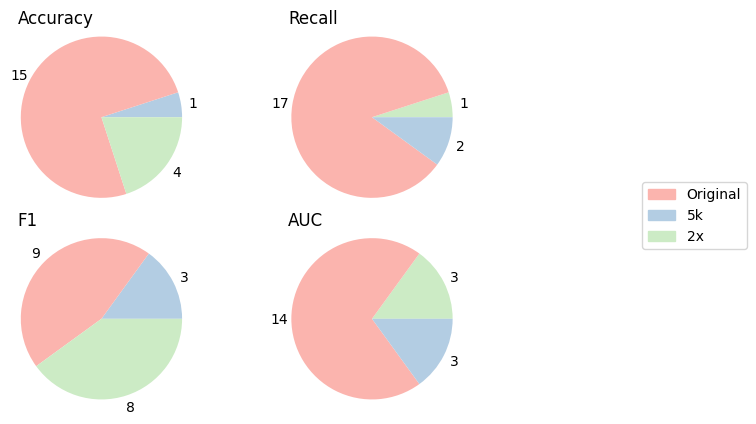

In [ ]:
# Auxiliar params para derivações
aux = dfr.groupby(['HAI','Files','Selector']).count().reset_index()
params = []
for i in range(aux.shape[0]):
    params.append((aux.iloc[i,0],
                    aux.iloc[i,1],
                    aux.iloc[i,2]))
# Contar classes de n_samples
cmap = mpl.colormaps['Pastel1']
colours = {'Original':tuple,
           '5k':tuple,
           '2x':tuple}
# Argumentos para legenda
patches = []
for j,k in enumerate(colours.keys()):
    colours[k]=cmap(j)
    patches.append(mpatches.Patch(color=cmap(j),label=k))
# Inicialização do plot
fig,ax = plt.subplots(2,2) #grid para 4 métricas
a,b = 0,0
overall = {}
for metric in metrics:
    counter = {}
    for version,files,fselector in params:
        escopo = dfr.query("HAI == '"+version+
                            "' and Files == '"+files+
                            "' and Selector == '"+fselector+"'")
        n_samples = {}
        n_samples[5000] = '5k'
        if escopo['N_Samples'].unique().shape[0] == 1:
            n_samples[escopo['N_Samples'].unique()[0]] = 'Original'
        elif escopo['N_Samples'].unique().shape[0] == 2:
            r = escopo['N_Samples'].unique()[0]
            s = escopo['N_Samples'].unique()[1]
            if 2*r == s:
                n_samples[r] = "Original"
                n_samples[s] = "2x"
            if 2*s == r:
                n_samples[s] = "Original"
                n_samples[r] = "2x"
            elif r == 5000:
                n_samples[s] = "Original"
            else:
                n_samples[r] = "Original"
        else:
            r = escopo['N_Samples'].unique()[0]
            s = escopo['N_Samples'].unique()[1]
            t = escopo['N_Samples'].unique()[2]
            if 2*r == s:
                n_samples[r] = "Original"
                n_samples[s] = "2x"
            if 2*s == r:
                n_samples[s] = "Original"
                n_samples[r] = "2x"
            elif 2*r == t:
                n_samples[r] = "Original"
                n_samples[t] = "2x"
            elif 2*t == r:
                n_samples[t] = "Original"
                n_samples[s] = "2x"
            elif 2*t == s:
                n_samples[t] = "Original"
                n_samples[s] = "2x"
            elif 2*s == t:
                n_samples[s] = "Original"
                n_samples[t] = "2x"
            
        max_value = escopo[metric+'_1s_Median'].max()
        candidatos = escopo.query(metric+'_1s_Median == '+str(max_value))
        if candidatos.shape[0] != 1: #primeiro critério de desempate: menor FN
            min_fn = candidatos["FN_1s_Median"].min()
            candidatos = candidatos.query("FN_1s_Median == "+str(min_fn))
            if candidatos.shape[0] != 1: #Segundo critério de desempate: menor FP
                min_fp = candidatos["FP_1s_Median"].min()
                candidatos = candidatos.query("FP_1s_Median == "+str(min_fp))
                if candidatos.shape[0] != 1: #Terceiro critério de desempate: menor FN na média
                    min_fn = candidatos["FN_1s_Mean"].min()
                    candidatos = candidatos.query("FN_1s_Mean == "+str(min_fn))
                    if candidatos.shape[0] != 1: #Quarto critério de desempate: menor FP na média. Se mais de um, todos somam
                        min_fp = candidatos["FP_1s_Mean"].min()
                        candidatos = candidatos.query("FP_1s_Mean == "+str(min_fp))
        for winner in candidatos['N_Samples'].unique():
            if n_samples[winner] not in counter.keys():
                counter[n_samples[winner]] = 0
            counter[n_samples[winner]] += 1

    val_asc = {k: counter[k] for k in sorted(counter.keys(),key=counter.__getitem__,reverse=False)}
    val_desc = {k: counter[k] for k in sorted(counter.keys(),key=counter.__getitem__,reverse=True)}
    aux = {}
    for k1,k2 in zip(val_asc,val_desc):
        if k1 in aux.keys() and k2 in aux.keys():
            continue
        elif k1 in aux.keys():
            aux[k2] = val_desc[k2]
        elif k2 in aux.keys():
            aux[k1] = val_asc[k1]
        else:
            aux[k1] = val_asc[k1]
            aux[k2] = val_desc[k2]
    ax[a][b].pie(aux.values(),
                 autopct=lambda x:np.round(x/100.*pd.Series(aux.values()).sum(),0).astype(int),
                 pctdistance=1.15,
                 startangle=0,
                 radius=1.2,
                 colors=[colours[x] for x in aux.keys()])
    ax[a][b].set_title(metric,y=1.01,loc='left')
    b = (b+1) % 2
    a = (a + b + 1) % 2
    overall[metric] = counter
fig.legend(patches,colours.keys(),loc='center right',bbox_to_anchor=(1.32,0.5))
# plt.savefig("pies_nsamples.png",bbox_inches="tight")
plt.show()
plt.close()

### Apenas melhoria

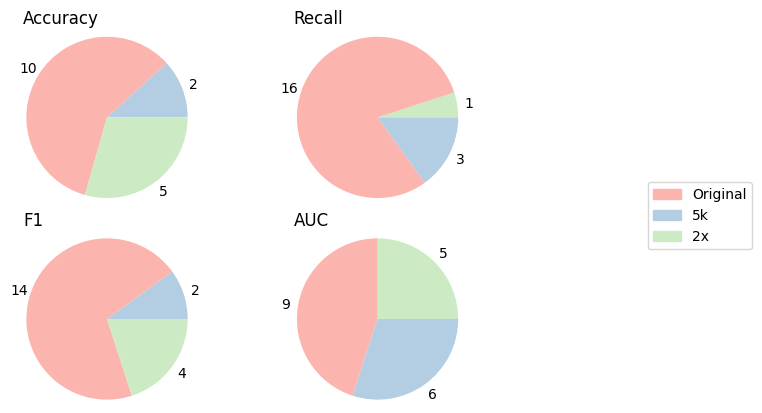

In [ ]:
# Auxiliar params diferenciado
aux = dfr.groupby(['HAI','Files','Selector']).count().reset_index()
params = []
for i in range(aux.shape[0]):
    params.append((aux.iloc[i,0],
                    aux.iloc[i,1],
                    aux.iloc[i,2]))
# Contar classes de n_samples
cmap = mpl.colormaps['Pastel1']
colours = {'Original':tuple,
           '5k':tuple,
           '2x':tuple}
# Argumentos para legenda
patches = []
for j,k in enumerate(colours.keys()):
    colours[k]=cmap(j)
    patches.append(mpatches.Patch(color=cmap(j),label=k))
# Inicialização do plot
fig,ax = plt.subplots(2,2) #grid para 4 métricas
a,b = 0,0
overall = {}
for metric in metrics:
    counter = {}
    for version,files,fselector in params:
        escopo = dfr.query("HAI == '"+version+
                            "' and Files == '"+files+
                            "' and Selector == '"+fselector+
                            "' and Classifier_2s_"+metric+"_Median != '1step_only'")
        if escopo.shape[0] == 0: 
            continue
        n_samples = {}
        n_samples[5000] = '5k'
        if escopo['N_Samples'].unique().shape[0] == 1:
            n_samples[escopo['N_Samples'].unique()[0]] = 'Original'
        elif escopo['N_Samples'].unique().shape[0] == 2:
            r = escopo['N_Samples'].unique()[0]
            s = escopo['N_Samples'].unique()[1]
            if 2*r == s:
                n_samples[r] = "Original"
                n_samples[s] = "2x"
            if 2*s == r:
                n_samples[s] = "Original"
                n_samples[r] = "2x"
            elif r == 5000:
                n_samples[s] = "Original"
            else:
                n_samples[r] = "Original"
        else:
            r = escopo['N_Samples'].unique()[0]
            s = escopo['N_Samples'].unique()[1]
            t = escopo['N_Samples'].unique()[2]
            if 2*r == s:
                n_samples[r] = "Original"
                n_samples[s] = "2x"
            if 2*s == r:
                n_samples[s] = "Original"
                n_samples[r] = "2x"
            elif 2*r == t:
                n_samples[r] = "Original"
                n_samples[t] = "2x"
            elif 2*t == r:
                n_samples[t] = "Original"
                n_samples[s] = "2x"
            elif 2*t == s:
                n_samples[t] = "Original"
                n_samples[s] = "2x"
            elif 2*s == t:
                n_samples[s] = "Original"
                n_samples[t] = "2x"
            
        max_value = escopo[metric+'_2s_Median'].max()
        candidatos = escopo.query(metric+'_2s_Median == '+str(max_value))
        if candidatos.shape[0] != 1: #primeiro critério de desempate: menor FN
            min_fn = candidatos["FN_2s_Median_"+metric].min()
            candidatos = candidatos.query("FN_2s_Median_"+metric+" == "+str(min_fn))
            if candidatos.shape[0] != 1: #Segundo critério de desempate: menor FP
                min_fp = candidatos["FP_2s_Median_"+metric].min()
                candidatos = candidatos.query("FP_2s_Median_"+metric+" == "+str(min_fp))
                if candidatos.shape[0] != 1: #Terceiro critério de desempate: menor FN na média
                    min_fn = candidatos["FN_2s_Mean_"+metric].min()
                    candidatos = candidatos.query("FN_2s_Mean_"+metric+" == "+str(min_fn))
                    if candidatos.shape[0] != 1: #Quarto critério de desempate: menor FP na média. Se mais de um, todos somam
                        min_fp = candidatos["FP_2s_Mean_"+metric].min()
                        candidatos = candidatos.query("FP_2s_Mean_"+metric+" == "+str(min_fp))
        for winner in candidatos['N_Samples'].unique():
            if n_samples[winner] not in counter.keys():
                counter[n_samples[winner]] = 0
            counter[n_samples[winner]] += 1

    val_asc = {k: counter[k] for k in sorted(counter.keys(),key=counter.__getitem__,reverse=False)}
    val_desc = {k: counter[k] for k in sorted(counter.keys(),key=counter.__getitem__,reverse=True)}
    aux = {}
    for k1,k2 in zip(val_asc,val_desc):
        if k1 in aux.keys() and k2 in aux.keys():
            continue
        elif k1 in aux.keys():
            aux[k2] = val_desc[k2]
        elif k2 in aux.keys():
            aux[k1] = val_asc[k1]
        else:
            aux[k1] = val_asc[k1]
            aux[k2] = val_desc[k2]
    ax[a][b].pie(aux.values(),
                 autopct=lambda x:np.round(x/100.*pd.Series(aux.values()).sum(),0).astype(int),
                 pctdistance=1.15,
                 startangle=0,
                 radius=1.2,
                 colors=[colours[x] for x in aux.keys()])
    ax[a][b].set_title(metric,y=1.01,loc='left')
    b = (b+1) % 2
    a = (a + b + 1) % 2
    overall[metric] = counter
fig.legend(patches,colours.keys(),loc='center right',bbox_to_anchor=(1.32,0.5))
# plt.savefig("pies_nsamples.png",bbox_inches="tight")
plt.show()
plt.close()

### Vejamos para os test_size (10% 35% 50%)

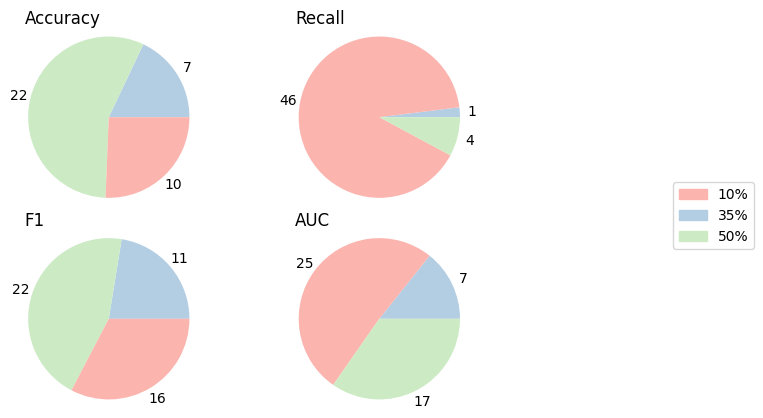

In [ ]:
# Auxiliar params diferenciado
aux = dfr.groupby(['HAI','Files','Selector','N_Samples']).count().reset_index()
params = []
for i in range(aux.shape[0]):
    params.append((aux.iloc[i,0],
                    aux.iloc[i,1],
                    aux.iloc[i,2],
                    aux.iloc[i,3],))
# Contar classes de n_samples
cmap = mpl.colormaps['Pastel1']
colours = {'10%':tuple,
           '35%':tuple,
           '50%':tuple}
# Argumentos para legenda
patches = []
for j,k in enumerate(colours.keys()):
    colours[k]=cmap(j)
    patches.append(mpatches.Patch(color=cmap(j),label=k))
# Inicialização do plot
fig,ax = plt.subplots(2,2) #grid para 4 métricas
a,b = 0,0
overall = {}
for metric in metrics:
    counter = {}
    for version,files,fselector,n_samples in params:
        escopo = dfr.query("HAI == '"+version+
                            "' and Files == '"+files+
                            "' and Selector == '"+fselector+
                            "' and N_Samples == "+str(n_samples)+
                            " and Classifier_2s_"+metric+"_Median != '1step_only'")
        if escopo.shape[0] == 0:
            continue
        mapper = {}
        if escopo['Test_Size'].unique().shape[0] == 1:
            if round(escopo['Test_Size'].unique()[0]/n_samples,2) == 0.1:
                mapper[escopo['Test_Size'].unique()[0]] = '10%'
            elif round(escopo['Test_Size'].unique()[0]/n_samples,2) == 0.35:
                mapper[escopo['Test_Size'].unique()[0]] = '35%'
            else:
                mapper[escopo['Test_Size'].unique()[0]] = '50%'
        elif escopo['Test_Size'].unique().shape[0] == 2:
            r,s = escopo['Test_Size'].unique()
            if round(r,2) == 0.1:
                mapper[r] = '10%'
            elif round(r,2) == 0.35:
                mapper[r] = '35%'
            else:
                mapper[r] = '50%'
            if round(s,2) == 0.1:
                mapper[s] = '10%'
            elif round(s,2) == 0.35:
                mapper[s] = '35%'
            else:
                mapper[s] = '50%'
        else:
            r,s,t = escopo['Test_Size'].unique()
            if r < s and r < t:
                mapper[r] = '10%'
                if s < t:
                    mapper[s] = '35%'
                    mapper[t] = '50%'
                else:
                    mapper[t] = '35%'
                    mapper[s] = '50%'
            elif s < r and s < t:
                mapper[s] = '10%'
                if r < t:
                    mapper[r] = '35%'
                    mapper[t] = '50%'
                else:
                    mapper[t] = '35%'
                    mapper[r] = '50%'
            else:
                mapper[t] = '10%'
                if r < s:
                    mapper[r] = '35%'
                    mapper[s] = '50%'
                else:
                    mapper[s] = '35%'
                    mapper[r] = '50%'
        
        max_value = escopo[metric+'_2s_Median'].max()
        candidatos = escopo.query(metric+'_2s_Median == '+str(max_value))
        if candidatos.shape[0] != 1: #primeiro critério de desempate: menor FN
            min_fn = candidatos["FN_2s_Median_"+metric].min()
            candidatos = candidatos.query("FN_2s_Median_"+metric+" == "+str(min_fn))
            if candidatos.shape[0] != 1: #Segundo critério de desempate: menor FP
                min_fp = candidatos["FP_2s_Median_"+metric].min()
                candidatos = candidatos.query("FP_2s_Median_"+metric+" == "+str(min_fp))
                if candidatos.shape[0] != 1: #Terceiro critério de desempate: menor FN na média
                    min_fn = candidatos["FN_2s_Mean_"+metric].min()
                    candidatos = candidatos.query("FN_2s_Mean_"+metric+" == "+str(min_fn))
                    if candidatos.shape[0] != 1: #Quarto critério de desempate: menor FP na média. Se mais de um, todos somam
                        min_fp = candidatos["FP_2s_Mean_"+metric].min()
                        candidatos = candidatos.query("FP_2s_Mean_"+metric+" == "+str(min_fp))
        for winner in candidatos['Test_Size'].unique():
            if mapper[winner] not in counter.keys():
                counter[mapper[winner]] = 0
            counter[mapper[winner]] += 1

    val_asc = {k: counter[k] for k in sorted(counter.keys(),key=counter.__getitem__,reverse=False)}
    val_desc = {k: counter[k] for k in sorted(counter.keys(),key=counter.__getitem__,reverse=True)}
    aux = {}
    for k1,k2 in zip(val_asc,val_desc):
        if k1 in aux.keys() and k2 in aux.keys():
            continue
        elif k1 in aux.keys():
            aux[k2] = val_desc[k2]
        elif k2 in aux.keys():
            aux[k1] = val_asc[k1]
        else:
            aux[k1] = val_asc[k1]
            aux[k2] = val_desc[k2]
    ax[a][b].pie(aux.values(),
                 autopct=lambda x:np.round(x/100.*pd.Series(aux.values()).sum(),0).astype(int),
                 pctdistance=1.15,
                 startangle=0,
                 radius=1.2,
                 colors=[colours[x] for x in aux.keys()])
    ax[a][b].set_title(metric,y=1.01,loc='left')
    b = (b+1) % 2
    a = (a + b + 1) % 2
    overall[metric] = counter
fig.legend(patches,colours.keys(),loc='center right',bbox_to_anchor=(1.32,0.5))
# plt.savefig("pies_nsamples.png",bbox_inches="tight")
plt.show()
plt.close()

### Agora para o contamination.
Aqui há que se tomar cuidado pois está restrito à quantidade de ataques da derivação de origem. Nesses casos, na construção colocamos o máximo disponível na derivação. Para a análise, como são poucos casos, criaremos um novo com a proporcão arredondada.

In [ ]:
# Determinando quantas possibilidades de contamination, dado que sofreu variação dos valores originais: 0.05,0.1,0.25 e 0.5
aux = dfr.groupby(['HAI','Files','Selector','N_Samples','Test_Size']).count().reset_index()
params = []
for i in range(aux.shape[0]):
    params.append((aux.iloc[i,0],
                    aux.iloc[i,1],
                    aux.iloc[i,2],
                    aux.iloc[i,3],
                    aux.iloc[i,4],))
    
tmp = []
for metric in metrics:
    for version,files,fselector,n_samples,test_size in params:
        escopo = dfr.query("HAI == '"+version+
                            "' and Files == '"+files+
                            "' and Selector == '"+fselector+
                            "' and N_Samples == "+str(n_samples)+
                            " and Test_Size == "+str(test_size)+
                            " and Classifier_2s_"+metric+"_Median != '1step_only'")
        if escopo.shape[0] == 0:
            continue
        qtd = escopo['Contamination'].unique().shape[0]
        if qtd >= 1:
            r = escopo['Contamination'].unique()[0]
            poss = round(r/test_size,2)
            if poss not in tmp:
                tmp.append(poss)
        if qtd >= 2:
            s = escopo['Contamination'].unique()[1]
            poss = round(s/test_size,2)
            if poss not in tmp:
                tmp.append(poss)
        if qtd >= 3:
            t = escopo['Contamination'].unique()[2]
            poss = round(t/test_size,2)
            if poss not in tmp:
                tmp.append(poss)
        if qtd == 4:
            u = escopo['Contamination'].unique()[3]
            poss = round(u/test_size,2)
            if poss not in tmp:
                tmp.append(poss)
print(tmp)

[0.05, 0.1, 0.25, 0.5, 0.09, 0.49, 0.3, 0.15, 0.18, 0.08, 0.33, 0.16, 0.32, 0.17, 0.22, 0.11]


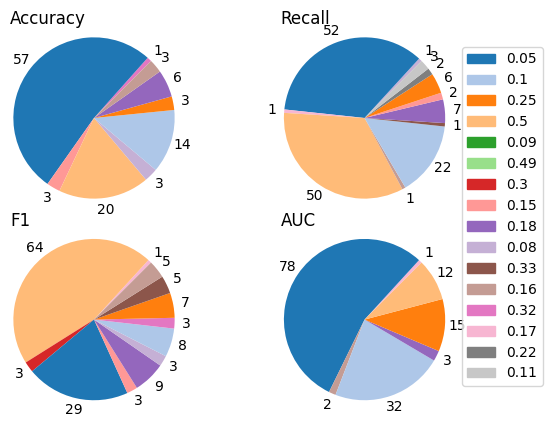

In [ ]:
tmp = [0.05, 0.1, 0.25, 0.5, 0.09, 0.49, 0.3, 0.15, 0.18, 0.08, 0.33, 0.16, 0.32, 0.17, 0.22, 0.11]
cmap = mpl.colormaps['tab20']
colours = {}
# Argumentos para legenda
patches = []
for j,k in enumerate(tmp):
    colours[k]=cmap(j)
    patches.append(mpatches.Patch(color=cmap(j),label=k))
# Inicialização do plot
fig,ax = plt.subplots(2,2) #grid para 4 métricas
a,b = 0,0
overall = {}
for metric in metrics:
    counter = {}
    for version,files,fselector,n_samples,test_size in params:
        escopo = dfr.query("HAI == '"+version+
                            "' and Files == '"+files+
                            "' and Selector == '"+fselector+
                            "' and N_Samples == "+str(n_samples)+
                            " and Test_Size == "+str(test_size)+
                            " and Classifier_2s_"+metric+"_Median != '1step_only'")
        if escopo.shape[0] == 0:
            continue
        mapper = {}
        shape0 = escopo['Contamination'].unique().shape[0]
        if shape0 >= 1:
            r = escopo['Contamination'].unique()[0]
            mapper[r] = round(r/test_size,2)
        if shape0 >= 2:
            r = escopo['Contamination'].unique()[1]
            mapper[r] = round(r/test_size,2)
        if shape0 >= 3:
            r = escopo['Contamination'].unique()[2]
            mapper[r] = round(r/test_size,2)
        if shape0 == 4:
            r = escopo['Contamination'].unique()[3]
            mapper[r] = round(r/test_size,2)
        if shape0 > 4:
            raise NotImplementedError
        
        max_value = escopo[metric+'_2s_Median'].max()
        candidatos = escopo.query(metric+'_2s_Median == '+str(max_value))
        if candidatos.shape[0] != 1: #primeiro critério de desempate: menor FN
            min_fn = candidatos["FN_2s_Median_"+metric].min()
            candidatos = candidatos.query("FN_2s_Median_"+metric+" == "+str(min_fn))
            if candidatos.shape[0] != 1: #Segundo critério de desempate: menor FP
                min_fp = candidatos["FP_2s_Median_"+metric].min()
                candidatos = candidatos.query("FP_2s_Median_"+metric+" == "+str(min_fp))
                if candidatos.shape[0] != 1: #Terceiro critério de desempate: menor FN na média
                    min_fn = candidatos["FN_2s_Mean_"+metric].min()
                    candidatos = candidatos.query("FN_2s_Mean_"+metric+" == "+str(min_fn))
                    if candidatos.shape[0] != 1: #Quarto critério de desempate: menor FP na média. Se mais de um, todos somam
                        min_fp = candidatos["FP_2s_Mean_"+metric].min()
                        candidatos = candidatos.query("FP_2s_Mean_"+metric+" == "+str(min_fp))
        for winner in candidatos['Contamination'].unique():
            if mapper[winner] not in counter.keys():
                counter[mapper[winner]] = 0
            counter[mapper[winner]] += 1

    val_asc = {k: counter[k] for k in sorted(counter.keys(),key=counter.__getitem__,reverse=False)}
    val_desc = {k: counter[k] for k in sorted(counter.keys(),key=counter.__getitem__,reverse=True)}
    aux = {}
    for k1,k2 in zip(val_asc,val_desc):
        if k1 in aux.keys() and k2 in aux.keys():
            continue
        elif k1 in aux.keys():
            aux[k2] = val_desc[k2]
        elif k2 in aux.keys():
            aux[k1] = val_asc[k1]
        else:
            aux[k1] = val_asc[k1]
            aux[k2] = val_desc[k2]
    ax[a][b].pie(aux.values(),
                 autopct=lambda x:np.round(x/100.*pd.Series(aux.values()).sum(),0).astype(int),
                 pctdistance=1.15,
                 startangle=45,
                 radius=1.2,
                 colors=[colours[x] for x in aux.keys()])
    ax[a][b].set_title(metric,y=1.01,loc='left')
    b = (b+1) % 2
    a = (a + b + 1) % 2
    overall[metric] = counter
fig.legend(patches,colours.keys(),loc='center right',bbox_to_anchor=(1.0132,0.5))
# plt.savefig("pies_nsamples.png",bbox_inches="tight")
plt.show()
plt.close()

## Scatter dos FNR e FPR da detecção composta

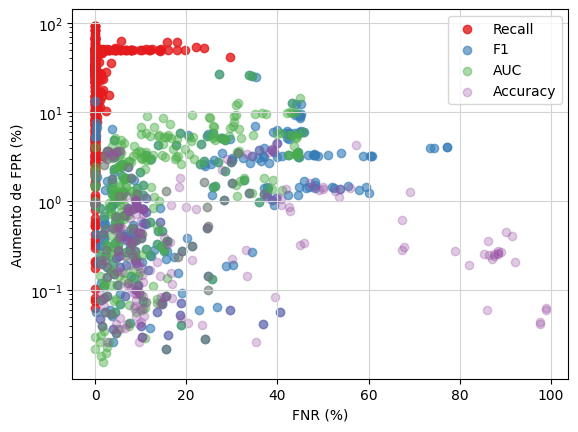

In [ ]:
fig,ax = plt.subplots()
cmap = mpl.colormaps['Set1']
alpha = {}
metrics = ["Recall","F1","AUC","Accuracy"]
for i,metric in enumerate(metrics):
    fnr = []
    fpr = []
    alpha[metric] = np.linspace(0.8,0.3,4)[i]
    for version,files,fselector,n_samples,test_size,contamination in params:
        escopo = dfr.query("HAI == '"+version+
                            "' and Files == '"+files+
                            "' and Selector == '"+fselector+
                            "' and N_Samples == "+str(n_samples)+
                            " and Test_Size == "+str(test_size)+
                            " and Contamination == "+str(contamination)+
                            " and Classifier_2s_"+metric+"_Median != '1step_only'")
        if escopo.shape[0] == 0:
            continue
        max_value = escopo[metric+'_2s_Median'].max()
        candidatos = escopo.query(metric+'_2s_Median == '+str(max_value))
        if candidatos.shape[0] != 1: #primeiro critério de desempate: menor FN
            min_fn = candidatos["FN_2s_Median_"+metric].min()
            candidatos = candidatos.query("FN_2s_Median_"+metric+" == "+str(min_fn))
            if candidatos.shape[0] != 1: #Segundo critério de desempate: menor FP
                min_fp = candidatos["FP_2s_Median_"+metric].min()
                candidatos = candidatos.query("FP_2s_Median_"+metric+" == "+str(min_fp))
                if candidatos.shape[0] != 1: #Terceiro critério de desempate: menor FN na média
                    min_fn = candidatos["FN_2s_Mean_"+metric].min()
                    candidatos = candidatos.query("FN_2s_Mean_"+metric+" == "+str(min_fn))
                    if candidatos.shape[0] != 1: #Quarto critério de desempate: menor FP na média. Se mais de um, todos somam
                        min_fp = candidatos["FP_2s_Mean_"+metric].min()
                        candidatos = candidatos.query("FP_2s_Mean_"+metric+" == "+str(min_fp))
        winner = np.random.choice(candidatos.index)
        x = candidatos.loc[winner,'FNR_2s_Median_'+metric]
        y = candidatos.loc[winner,'FPR_2s_Median_'+metric]-candidatos.loc[winner,'FPR_1s_Median']
        fnr.append(x*100)
        fpr.append(y*100)
    ax.scatter(fnr,fpr,color=cmap(i),alpha=alpha[metric],label=metric)
ax.set_yscale('log')
ax.set_xlabel("FNR (%)")
ax.set_ylabel("Aumento de FPR (%)")
ax.legend()
ax.grid(color='lightgray')
plt.savefig("scatter_fnr.png",bbox_inches="tight")
plt.show()
plt.close()

## Qual o aumento de métricas para as melhores composições considerando o limiar?

In [ ]:
auxl = {}
auxl["Metrica"] = []
auxl["Cenario"] = []
auxl["Ganho_medio_Abs"] = []
auxl["Ganho_medio_Rel"] = []
auxl["Ganho_Abs_MaxMetric"] = []
auxl["Ganho_Rel_MaxMetric"] = []
auxl["MaxMetric"] = []
for metric in metrics:
    for version,files,fselector,n_samples,test_size,contamination in params:
        param = (version,files,fselector,n_samples,test_size,contamination)
        escopo = dfr.query("HAI == '"+version+
                            "' and Files == '"+files+
                            "' and Selector == '"+fselector+
                            "' and N_Samples == "+str(n_samples)+
                            " and Test_Size == "+str(test_size)+
                            " and Contamination == "+str(contamination)+
                            " and "+metric+"_1s_Median >= "+str(threshold)+
                            " and Classifier_2s_"+metric+"_Median != '1step_only'")
        if escopo.shape[0] == 0:
            continue
        auxl["Metrica"].append(metric)
        auxl["Cenario"].append(param)
        auxl["Ganho_medio_Abs"].append(escopo[metric+"_Abs_Median"].mean())
        auxl["Ganho_medio_Rel"].append(escopo[metric+"_Rel_Median"].mean())
        max_metric = escopo[metric+'_2s_Median'].max()
        candidatos = escopo.query(metric+'_2s_Median == '+str(max_metric))
        if candidatos.shape[0] != 1: #primeiro critério de desempate: menor FN
            min_fn = candidatos["FN_2s_Median_"+metric].min()
            candidatos = candidatos.query("FN_2s_Median_"+metric+" == "+str(min_fn))
            if candidatos.shape[0] != 1: #Segundo critério de desempate: menor FP
                min_fp = candidatos["FP_2s_Median_"+metric].min()
                candidatos = candidatos.query("FP_2s_Median_"+metric+" == "+str(min_fp))
                if candidatos.shape[0] != 1: #Terceiro critério de desempate: menor FN na média
                    min_fn = candidatos["FN_2s_Mean_"+metric].min()
                    candidatos = candidatos.query("FN_2s_Mean_"+metric+" == "+str(min_fn))
                    if candidatos.shape[0] != 1: #Quarto critério de desempate: menor FP na média. Se mais de um, todos somam
                        min_fp = candidatos["FP_2s_Mean_"+metric].min()
                        candidatos = candidatos.query("FP_2s_Mean_"+metric+" == "+str(min_fp))
        auxl["Ganho_Abs_MaxMetric"].append(candidatos[metric+'_Abs_Median'].max())
        auxl["Ganho_Rel_MaxMetric"].append(candidatos[metric+'_Rel_Median'].max())
        auxl["MaxMetric"].append(max_metric)
resultadol = pd.DataFrame(auxl)
# resultadol.to_csv("Relatório.csv",index=False,sep=';',encoding='utf-8',decimal=',') 

In [ ]:
resultadol[resultadol.Metrica == 'AUC']['Ganho_medio_Rel'].mean()

1.2977723618385255

## Quais os casos em que a composição zera os FN?


In [ ]:
lista = {}
for metric in metrics:
    lista[metric] = []
    for version,files,fselector,n_samples,test_size,contamination in params:
        param = (version,files,fselector,n_samples,test_size,contamination)
        escopo = dfr.query("HAI == '"+version+
                            "' and Files == '"+files+
                            "' and Selector == '"+fselector+
                            "' and N_Samples == "+str(n_samples)+
                            " and Test_Size == "+str(test_size)+
                            " and Contamination == "+str(contamination)+
                            " and FN_1s_Median > 0 and FN_2s_Median_Accuracy == 0")
        if escopo.shape[0] > 0:
            lista[metric].append(param)

In [ ]:
lista['Accuracy']

[('hai20', 'te2', 'ext-sfm', 1156, 116, 12),
 ('hai20', 'te2', 'rfcv10', 547, 55, 3),
 ('hai20', 'te2', 'rfcv10', 547, 55, 5),
 ('hai20', 'te2', 'rfcv10', 547, 55, 14),
 ('hai20', 'te2', 'sfm', 1099, 110, 5),
 ('hai20', 'tr1_te1', 'ext-sfm', 1961, 196, 10),
 ('hai20', 'tr1_te1', 'ext-sfm', 1961, 196, 20),
 ('hai20', 'tr1_te1', 'ext-sfm', 1961, 196, 49),
 ('hai20', 'tr1_te1', 'ext-sfm', 1961, 196, 98),
 ('hai20', 'tr1_te1', 'ext-sfm', 1961, 686, 69),
 ('hai20', 'tr1_te1', 'ext-sfm', 1961, 686, 172),
 ('hai20', 'tr1_te1', 'ext-sfm', 1961, 686, 343),
 ('hai20', 'tr1_te1', 'ext-sfm', 1961, 980, 98),
 ('hai20', 'tr1_te1', 'ext-sfm', 1961, 980, 245),
 ('hai20', 'tr1_te1', 'ext-sfm', 1961, 980, 490),
 ('hai20', 'tr1_te1', 'ext-sfm', 3922, 392, 20),
 ('hai20', 'tr1_te1', 'ext-sfm', 3922, 392, 39),
 ('hai20', 'tr1_te1', 'ext-sfm', 3922, 392, 98),
 ('hai20', 'tr1_te1', 'ext-sfm', 3922, 1372, 137),
 ('hai20', 'tr1_te1', 'ext-sfm', 3922, 1372, 343),
 ('hai20', 'tr1_te1', 'ext-sfm', 3922, 1961, 98)

## Quantos cenários e derivações zeram o fn sem chegar a 1.0 de fpr?

In [ ]:
# Cenários
counter = {}
for metric in metrics:
    counter[metric] = 0
    for version,files,fselector,n_samples,test_size,contamination in params:
        escopo = dfr.query("HAI == '"+version+
                            "' and Files == '"+files+
                            "' and Selector == '"+fselector+
                            "' and N_Samples == "+str(n_samples)+
                            " and Test_Size == "+str(test_size)+
                            " and Contamination == "+str(contamination)+
                            " and FN_1s_Median > 0 and FN_2s_Median_"+metric+" == 0 and FPR_2s_Median_"+metric+" < 1.0")
        if escopo.shape[0] > 0:
            counter[metric] += 1
counter

{'Accuracy': 27, 'Recall': 361, 'F1': 65, 'AUC': 61}

In [ ]:
# Derivações
counter = {}
aux = dfr.groupby(['HAI','Files','Selector']).count().reset_index()
params = []
for i in range(aux.shape[0]):
    params.append((aux.iloc[i,0],
                    aux.iloc[i,1],
                    aux.iloc[i,2]))
for metric in metrics:
    counter[metric] = 0
    for version,files,fselector in params:
        escopo = dfr.query("HAI == '"+version+
                            "' and Files == '"+files+
                            "' and Selector == '"+fselector+
                            "' and FN_1s_Median > 0 and FN_2s_Median_"+metric+" == 0 and FPR_2s_Median_"+metric+" < 1.0")
        if escopo.shape[0] > 0:
            counter[metric] += 1
counter

{'Accuracy': 7, 'Recall': 20, 'F1': 9, 'AUC': 10}

Quantos cenários ficam com FNR < 5% e FPR < 1.0?

In [ ]:
counter = {}
for metric in metrics:
    counter[metric] = 0
    for version,files,fselector,n_samples,test_size,contamination in params:
        escopo = dfr.query("HAI == '"+version+
                            "' and Files == '"+files+
                            "' and Selector == '"+fselector+
                            "' and N_Samples == "+str(n_samples)+
                            " and Test_Size == "+str(test_size)+
                            " and Contamination == "+str(contamination)+
                            " and FN_1s_Median > 0 and FNR_2s_Median_"+metric+" <= 0.05 and FPR_2s_Median_"+metric+" < 1.0")
        if escopo.shape[0] > 0:
            counter[metric] += 1
counter

{'Accuracy': 362, 'Recall': 452, 'F1': 371, 'AUC': 380}

### Curva de FNR e cenários com FPR < 1.0

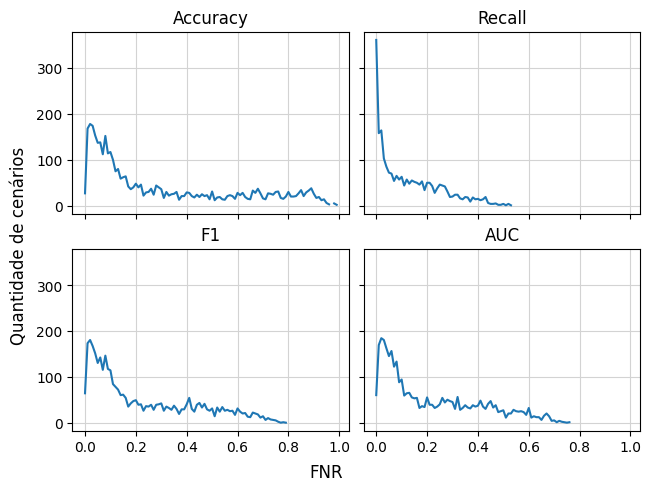

In [ ]:
fnr_cap = 1.0
mode = "Median"
fig,ax = plt.subplots(2,2,sharex=True,sharey=True,layout='constrained')
a,b = 0,0
for metric in metrics:
    counter = {}
    for fnr in range(0,100):
        key = fnr/100
        counter[key] = 0
        for version,files,fselector,n_samples,test_size,contamination in params:
            escopo = dfr.query("HAI == '"+version+
                               "' and Files == '"+files+
                               "' and Selector == '"+fselector+
                               "' and N_Samples == "+str(n_samples)+
                               " and Test_Size == "+str(test_size)+
                               " and Contamination == "+str(contamination)+
                               " and FN_1s_"+mode+" > 0 "+
                               " and FNR_2s_"+mode+"_"+metric+" <= "+str(key)+
                               " and FNR_2s_"+mode+"_"+metric+" > "+str(key-0.01)+
                               " and FPR_2s_"+mode+"_"+metric+" < "+str(fnr_cap))
            if escopo.shape[0] > 0:
                counter[key] += 1
    for k,v in counter.items():
        if v == 0:
            counter[k] = np.nan
    ax[a][b].plot(counter.keys(),counter.values())
    ax[a][b].set_title(metric)
    ax[a][b].grid(color='lightgray')
    b += 1
    if b > 1:
        a = 1
        b = 0
fig.supxlabel("FNR")
fig.supylabel("Quantidade de cenários")
plt.show()
plt.close()

# Visualização de ataque
Ataque AP16, na P1LCV01D

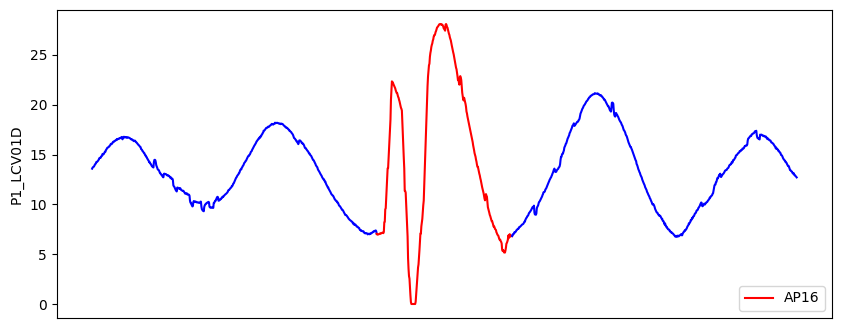

In [ ]:
# HAI 22.04 captura de 13/07/2021 às 23:40, 284 segundos
df = pd.read_csv("hai-master/hai-22.04/test2.csv")
#df['timestamp']
# determinando índices de interesse
#df.query("timestamp >= '2021-07-13 23:40'")[['timestamp']].head(5) # índice 27599
fig,ax = plt.subplots(figsize=(10,4))
ax.plot(df.loc[27000:27599,'timestamp'],df.loc[27000:27599,'P1_LCV01D'], color="blue")
ax.plot(df.loc[27599:27884,'timestamp'],df.loc[27599:27884,'P1_LCV01D'], color="red", label="AP16")
ax.plot(df.loc[27884:28483,'timestamp'],df.loc[27884:28483,'P1_LCV01D'], color="blue")
ax.set_xticks([])
ax.legend(loc=4)
ax.set_ylabel("P1_LCV01D")
plt.savefig("ap16.png",bbox_inches="tight")
plt.show()
plt.close()

## Gráfico da evolução de métrica para a composição

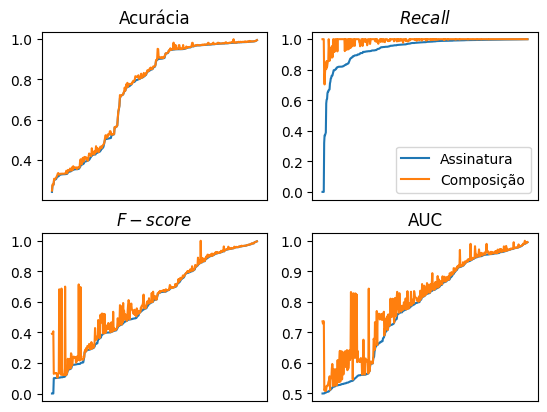

In [ ]:
mode = "Median"
fig,ax = plt.subplots(2,2)
a,b = 0,0
for metric in metrics:
    values = []
    for param in params:
        escopo = dfr.query("HAI == '"+param[0]+
                           "' and Files == '"+param[1]+
                           "' and Selector == '"+param[2]+
                           "' and N_Samples == "+str(param[3])+
                           " and Test_Size == "+str(param[4])+
                           " and Contamination == "+str(param[5])+
                           " and Classifier_2s_"+metric+"_"+mode+" != '1step_only'")
        if escopo.shape[0] == 0:
            continue
        
        values.append((escopo[metric+"_1s_"+mode].max(),escopo[metric+"_2s_"+mode].max()))
    values = sorted(values)
    ax[a][b].plot(values)
    if metric == 'Accuracy':
        ax[a][b].set_title('Acurácia')
    elif metric == 'Recall':
        ax[a][b].set_title('$Recall$')
    elif metric == 'F1':
        ax[a][b].set_title('$F-score$')
    else:
        ax[a][b].set_title(metric)
        
    ax[a][b].set_xticks([])
    b += 1
    if b > 1:
        a = 1
        b = 0
ax[0][1].legend(labels=["Assinatura","Composição"])
plt.savefig("plot1s2s.jpg",bbox_inches='tight')
plt.show()
plt.close()

### Por métrica:

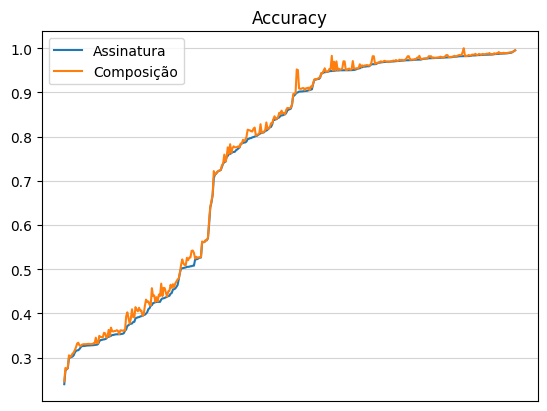

In [ ]:
mode = "Median"
fig,ax = plt.subplots()
a,b = 0,0
metric = metrics[0]
values = []
for param in params:
    escopo = dfr.query("HAI == '"+param[0]+
                        "' and Files == '"+param[1]+
                        "' and Selector == '"+param[2]+
                        "' and N_Samples == "+str(param[3])+
                        " and Test_Size == "+str(param[4])+
                        " and Contamination == "+str(param[5])+
                        " and Classifier_2s_"+metric+"_"+mode+" != '1step_only'")
    if escopo.shape[0] == 0:
        continue
    
    values.append((escopo[metric+"_1s_"+mode].max(),escopo[metric+"_2s_"+mode].max()))
values = sorted(values)
ax.plot(values)
ax.set_xticks([])
ax.grid(color='lightgray')
ax.set_title(metric)
ax.legend(labels=["Assinatura","Composição"])
plt.show()
plt.close()

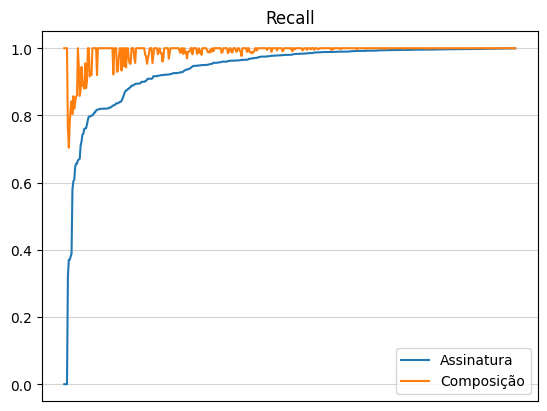

In [ ]:
mode = "Median"
fig,ax = plt.subplots()
a,b = 0,0
metric = metrics[1]
values = []
for param in params:
    escopo = dfr.query("HAI == '"+param[0]+
                        "' and Files == '"+param[1]+
                        "' and Selector == '"+param[2]+
                        "' and N_Samples == "+str(param[3])+
                        " and Test_Size == "+str(param[4])+
                        " and Contamination == "+str(param[5])+
                        " and Classifier_2s_"+metric+"_"+mode+" != '1step_only'")
    if escopo.shape[0] == 0:
        continue
    
    values.append((escopo[metric+"_1s_"+mode].max(),escopo[metric+"_2s_"+mode].max()))
values = sorted(values)
ax.plot(values)
ax.set_xticks([])
ax.grid(color='lightgray')
ax.set_title(metric)
ax.legend(labels=["Assinatura","Composição"])
plt.show()
plt.close()

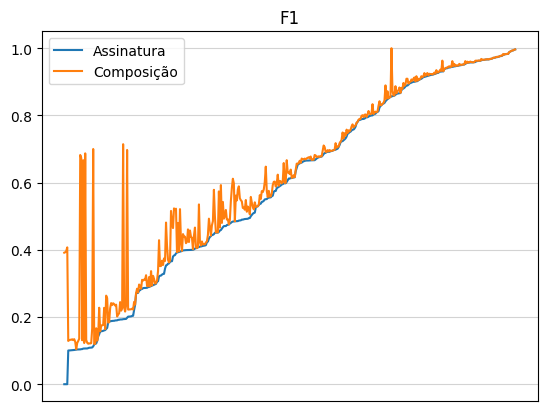

In [ ]:
mode = "Median"
fig,ax = plt.subplots()
a,b = 0,0
metric = metrics[2]
values = []
for param in params:
    escopo = dfr.query("HAI == '"+param[0]+
                        "' and Files == '"+param[1]+
                        "' and Selector == '"+param[2]+
                        "' and N_Samples == "+str(param[3])+
                        " and Test_Size == "+str(param[4])+
                        " and Contamination == "+str(param[5])+
                        " and Classifier_2s_"+metric+"_"+mode+" != '1step_only'")
    if escopo.shape[0] == 0:
        continue
    
    values.append((escopo[metric+"_1s_"+mode].max(),escopo[metric+"_2s_"+mode].max()))
values = sorted(values)
ax.plot(values)
ax.set_xticks([])
ax.grid(color='lightgray')
ax.set_title(metric)
ax.legend(labels=["Assinatura","Composição"])
plt.show()
plt.close()

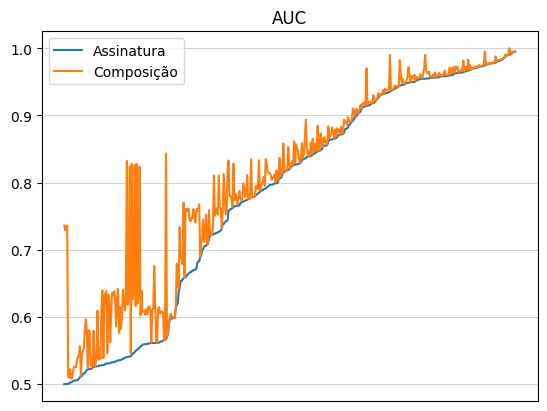

In [ ]:
mode = "Median"
fig,ax = plt.subplots()
a,b = 0,0
metric = metrics[3]
values = []
for param in params:
    escopo = dfr.query("HAI == '"+param[0]+
                        "' and Files == '"+param[1]+
                        "' and Selector == '"+param[2]+
                        "' and N_Samples == "+str(param[3])+
                        " and Test_Size == "+str(param[4])+
                        " and Contamination == "+str(param[5])+
                        " and Classifier_2s_"+metric+"_"+mode+" != '1step_only'")
    if escopo.shape[0] == 0:
        continue
    
    values.append((escopo[metric+"_1s_"+mode].max(),escopo[metric+"_2s_"+mode].max()))
values = sorted(values)
ax.plot(values)
ax.set_xticks([])
ax.grid(color='lightgray')
ax.set_title(metric)
ax.legend(labels=["Assinatura","Composição"])
plt.show()
plt.close()

## Agora com limiar.

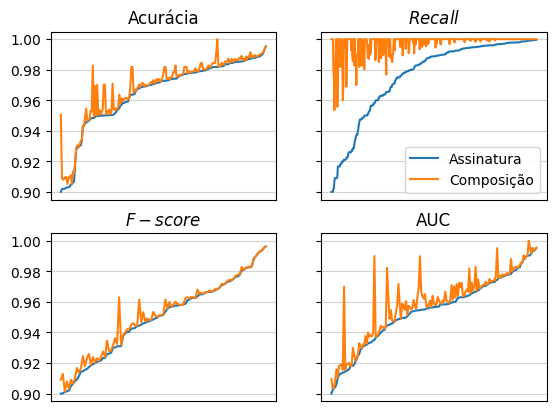

In [ ]:
mode = "Median"
fig,ax = plt.subplots(2,2,sharey=True)
a,b = 0,0
for metric in metrics:
    values = []
    for param in params:
        escopo = dfr.query("HAI == '"+param[0]+
                           "' and Files == '"+param[1]+
                           "' and Selector == '"+param[2]+
                           "' and N_Samples == "+str(param[3])+
                           " and Test_Size == "+str(param[4])+
                           " and Contamination == "+str(param[5])+
                           " and Classifier_2s_"+metric+"_"+mode+" != '1step_only'"+
                           " and "+metric+"_1s_"+mode+" >= "+str(threshold))
        if escopo.shape[0] == 0:
            continue
        
        values.append((escopo[metric+"_1s_"+mode].max(),escopo[metric+"_2s_"+mode].max()))
    values = sorted(values)
    ax[a][b].plot(values)
    if metric == 'Accuracy':
        ax[a][b].set_title('Acurácia')
    elif metric == 'Recall':
        ax[a][b].set_title('$Recall$')
    elif metric == 'F1':
        ax[a][b].set_title('$F-score$')
    else:
        ax[a][b].set_title(metric)
        
    ax[a][b].set_xticks([])
    ax[a][b].grid(color='lightgray')
    b += 1
    if b > 1:
        a = 1
        b = 0
ax[0][1].legend(labels=["Assinatura","Composição"])
# plt.savefig("plot1s2s-lim.jpg",bbox_inches='tight')
plt.show()
plt.close()

## Com limiar, ordenado pela métrica da composição

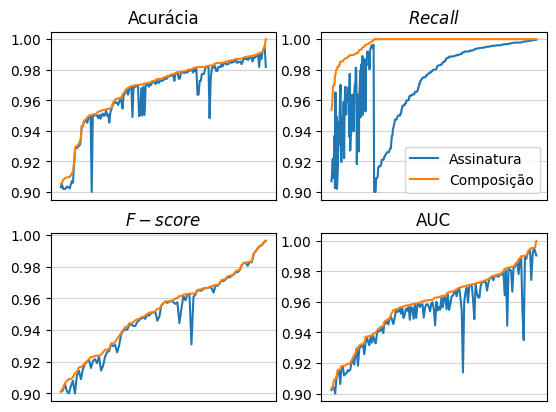

In [ ]:
mode = "Median"
fig,ax = plt.subplots(2,2)
a,b = 0,0
for metric in metrics:
    values = []
    for param in params:
        escopo = dfr.query("HAI == '"+param[0]+
                           "' and Files == '"+param[1]+
                           "' and Selector == '"+param[2]+
                           "' and N_Samples == "+str(param[3])+
                           " and Test_Size == "+str(param[4])+
                           " and Contamination == "+str(param[5])+
                           " and "+metric+"_1s_"+mode+" >= "+str(threshold)+
                           " and FPR_2s_"+mode+"_"+metric+" < 1.0 "+
                           " and Classifier_2s_"+metric+"_"+mode+" != '1step_only'")

        if escopo.shape[0] == 0:
            continue

        values.append((escopo[metric+"_1s_"+mode].max(),escopo[metric+"_2s_"+mode].max()))
    values = sorted(values,key=lambda x:(x[1],x[0]))

    ax[a][b].plot(values)
    if metric == 'Accuracy':
        ax[a][b].set_title('Acurácia')
    elif metric == 'Recall':
        ax[a][b].set_title('$Recall$')
    elif metric == 'F1':
        ax[a][b].set_title('$F-score$')
    else:
        ax[a][b].set_title(metric)
        
    ax[a][b].set_xticks([])
    ax[a][b].grid(color='lightgray')
    b += 1
    if b > 1:
        a = 1
        b = 0
ax[0][1].legend(labels=["Assinatura","Composição"])
plt.savefig("plot2s1s-lim.jpg",bbox_inches='tight')
plt.show()
plt.close()

## Sem limiar, ordenado pela métrica da composição

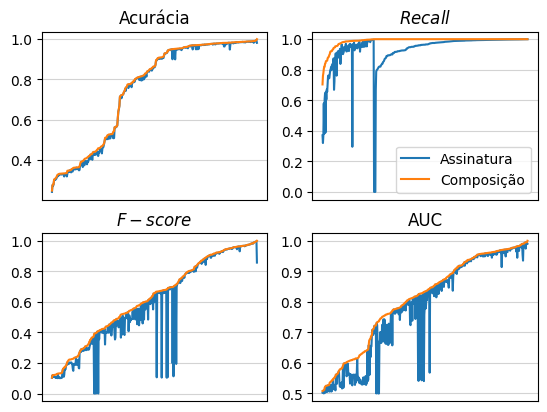

In [ ]:
mode = "Median"
fig,ax = plt.subplots(2,2)
a,b = 0,0
for metric in metrics:
    values = []
    for param in params:
        escopo = dfr.query("HAI == '"+param[0]+
                           "' and Files == '"+param[1]+
                           "' and Selector == '"+param[2]+
                           "' and N_Samples == "+str(param[3])+
                           " and Test_Size == "+str(param[4])+
                           " and Contamination == "+str(param[5])+
                           " and FPR_2s_"+mode+"_"+metric+" < 1.0 "+
                           " and Classifier_2s_"+metric+"_"+mode+" != '1step_only'")

        if escopo.shape[0] == 0:
            continue
        
        values.append((escopo[metric+"_1s_"+mode].max(),escopo[metric+"_2s_"+mode].max()))
    values = sorted(values,key=lambda x:(x[1],x[0]))

    ax[a][b].plot(values)
    if metric == 'Accuracy':
        ax[a][b].set_title('Acurácia')
    elif metric == 'Recall':
        ax[a][b].set_title('$Recall$')
    elif metric == 'F1':
        ax[a][b].set_title('$F-score$')
    else:
        ax[a][b].set_title(metric)
        
    ax[a][b].set_xticks([])
    ax[a][b].grid(color='lightgray')
    b += 1
    if b > 1:
        a = 1
        b = 0
ax[0][1].legend(labels=["Assinatura","Composição"])
plt.savefig("plot2s1s.jpg",bbox_inches='tight')
plt.show()
plt.close()

#### Gancho para valores médios das métricas:

In [ ]:
mode = "Median"
values = {}
for metric in metrics:
    values[metric+"_1s"] = []
    values[metric+"_2s"] = []
    for param in params:
        escopo = dfr.query("HAI == '"+param[0]+
                           "' and Files == '"+param[1]+
                           "' and Selector == '"+param[2]+
                           "' and N_Samples == "+str(param[3])+
                           " and Test_Size == "+str(param[4])+
                           " and Contamination == "+str(param[5])+
                           " and Classifier_2s_"+metric+"_"+mode+" != '1step_only'"+
                           " and "+metric+"_1s_"+mode+" >= "+str(threshold))
        if escopo.shape[0] == 0:
            continue
        
        values[metric+"_1s"].append(escopo[metric+"_1s_"+mode].max())
        values[metric+"_2s"].append(escopo[metric+"_2s_"+mode].max())
for metric in metrics:
    series = pd.Series(values[metric+"_2s"])
    print(metric)
    print("\tMin",series.min())
    print("\tMean",series.mean())
    print("\tMedian",series.median())
    print("\tMax",series.max())

Accuracy
	Min 0.9051724137931034
	Mean 0.968331300929803
	Median 0.9745222929936306
	Max 1.0
Recall
	Min 0.9534883720930232
	Mean 0.9975839135912029
	Median 1.0
	Max 1.0
F1
	Min 0.9012302481490294
	Mean 0.951743845494161
	Median 0.956964837216938
	Max 0.9963382153066014
AUC
	Min 0.9033333333333332
	Mean 0.9590710127429534
	Median 0.9621150841069952
	Max 1.0


E a diferença:

In [ ]:
mode = "Median"
values = {}
for metric in metrics:
    values[metric+"_1s"] = []
    values[metric+"_2s"] = []
    for param in params:
        escopo = dfr.query("HAI == '"+param[0]+
                           "' and Files == '"+param[1]+
                           "' and Selector == '"+param[2]+
                           "' and N_Samples == "+str(param[3])+
                           " and Test_Size == "+str(param[4])+
                           " and Contamination == "+str(param[5])+
                           " and Classifier_2s_"+metric+"_"+mode+" != '1step_only'"+
                           " and "+metric+"_1s_"+mode+" >= "+str(threshold))
        if escopo.shape[0] == 0:
            continue
        
        values[metric+"_1s"].append(escopo[metric+"_1s_"+mode].max())
        values[metric+"_2s"].append(escopo[metric+"_2s_"+mode].max())
for metric in metrics:
    series1s = pd.Series(values[metric+"_1s"])
    series2s = pd.Series(values[metric+"_2s"])
    print(metric)
    print("\tDiff Min",series2s.min()-series1s.min())
    print("\tDiff Mean",series2s.mean()-series1s.mean())
    print("\tDiff Median",series2s.median()-series1s.median())
    print("\tDiff Max",series2s.max()-series1s.max())

Accuracy
	Diff Min 0.005172413793103403
	Diff Mean 0.003261610493064726
	Diff Median 0.0017950202663578052
	Diff Max 0.004784130688447963
Recall
	Diff Min 0.05348837209302315
	Diff Mean 0.021404001413512508
	Diff Median 0.011235955056179803
	Diff Max 0.00035868005738881603
F1
	Diff Min 0.0012302481490293893
	Diff Mean 0.0023194233973145018
	Diff Median 0.005472975278561609
	Diff Max 1.2189696050324272e-06
AUC
	Diff Min 0.0033333333333331883
	Diff Mean 0.004837528062727747
	Diff Median 0.005521677513588563
	Diff Max 0.004784648343705178
